<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8/5/%D0%9C%D0%BE%D0%B9%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Строим столбчатые диаграммы по таблице с группировкой на первом столбце.


# Загрузки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files #to upload files Для загрузки файлов, не менять

files.upload()

# **Вариант Perplexity**

**Промпт для Perplexity:**

Проводим клиническое исследование. Результаты надо визуализировать. У каждого пациента в столбце A указана его группа (0 или 1), а в остальных - данные о пациенте. Необходимо сгруппировать данные о пациенте (в каждом столбце отдельно) по группе пациента. То есть по каждому данному у нас будет группа данных по 0 и группа по 1. Затем надо посчитать медиану группы данных(после группировки). Медиану считать надо после группировки, а не перед! Для этого используй сперва Pandas из Python.

Затем используй библиотеки визуализации данных и построй столбчатую диаграмму так, чтобы количество диаграмм было равно количеству наших группировок по данным, а высота столбцов в каждой группировке была равна вычисленной медиане группы.

Например: группировка по второму столбцу - группа 0 - 50, группа 1 - 65. И таких группировок столько, сколько у нас столбцов данных

Напиши код и подробно опиши его.

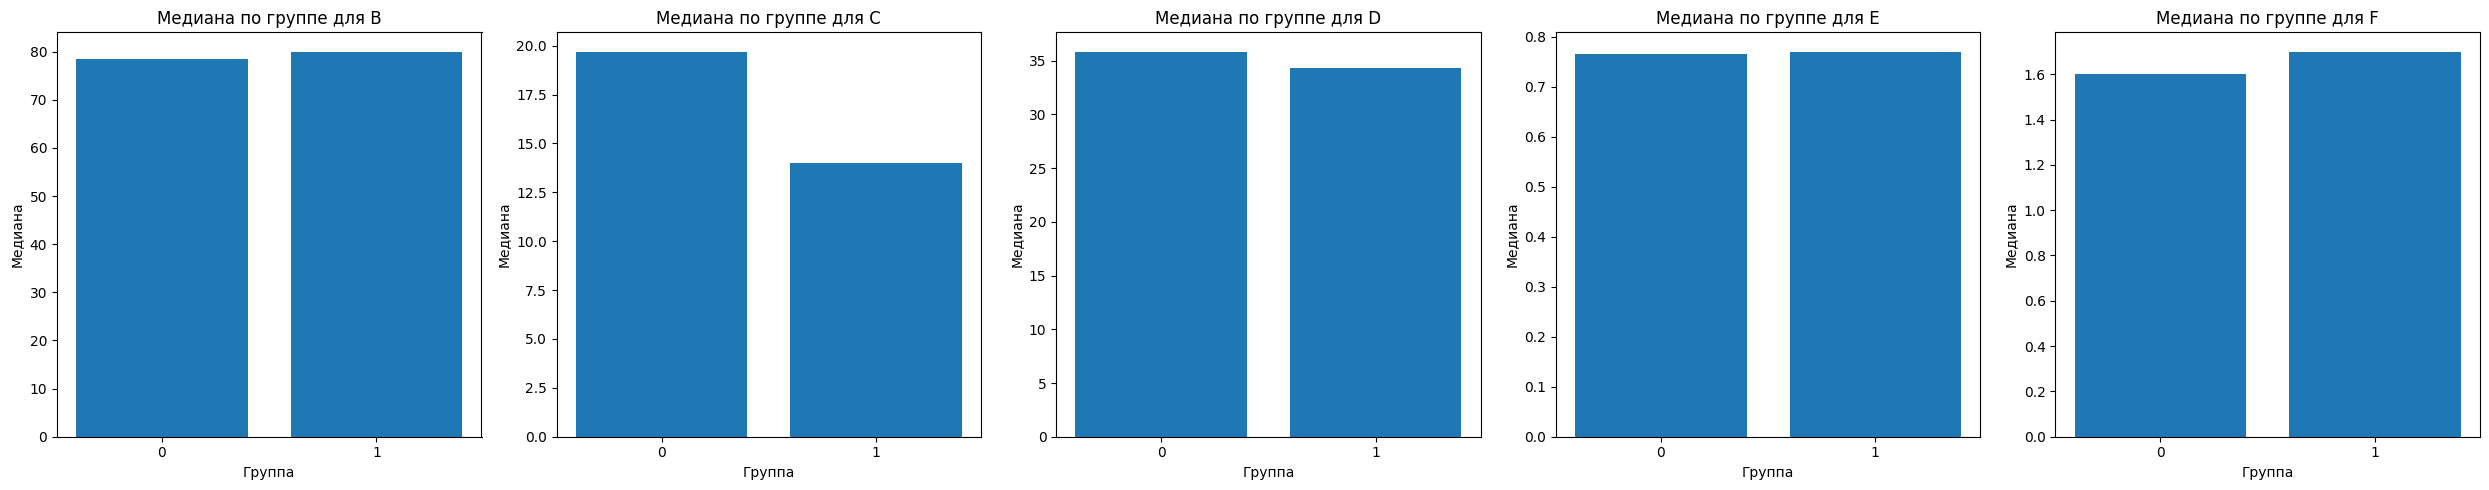

In [ ]:
df = pd.read_excel('data.xlsx')
# Предположим, у нас есть DataFrame df
df.columns = ['Group', 'B', 'C', 'D', 'E', 'F']

# Пример DataFrame
# df = pd.read_csv('data.csv')  # если данные из файла
# Предположим, DataFrame df уже загружен, где df.columns[0] - 'Group', остальные - данные

# Группировка данных по группе и вычисление медианы
median_df = df.groupby('Group').median()

# Построение диаграмм
num_features = median_df.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(5*num_features, 5))

if num_features == 1:
    axes = [axes]  # для единичного столбца сделаем список для одинаковой работы

for i, col in enumerate(median_df.columns):
    axes[i].bar(median_df.index.astype(str), median_df[col])
    axes[i].set_title(f'Медиана по группе для {col}')
    axes[i].set_xlabel('Группа')
    axes[i].set_ylabel('Медиана')

plt.tight_layout()
plt.show()




# **Вариант Qwen**

**Промпт для Qwen**

Проводим клиническое исследование. Результаты надо визуализировать. Мы имеем excel-таблицу с несколькими листами. Вот описание одного из листов: у каждого пациента в столбце A указана его группа (0 или 1), а в остальных - данные о пациенте. Необходимо сгруппировать данные о пациенте (в каждом столбце отдельно) по группе пациента. То есть по каждому данному у нас будет группа данных по 0 и группа по 1. Затем надо посчитать медиану группы данных(после группировки). Медиану считать надо после группировки, а не перед! Для этого используй сперва Pandas из Python.

Затем используй библиотеки визуализации данных и построй столбчатую диаграмму так, чтобы количество диаграмм было равно количеству наших группировок по данным, а высота столбцов в каждой группировке была равна вычисленной медиане группы.

Например: группировка по второму столбцу - группа 0 - 50, группа 1 - 65. И таких группировок столько, сколько у нас столбцов данных

Сделай возможность выбора листа для группировки в таблице.

Напиши код и подробно опиши его.

Введите путь к Excel-файлу (например, 'clinical_data.xlsx'): ДиаграммаСУсами.xlsx

Доступные листы в файле:
1. Лист2
2. А2
3. А2.1
4. А3
5. А 31
6. А5
7. А51
8. А7
9. А9
10. А9.1
11. А8

Выберите номер листа для анализа: 1
    group  PSV    ED   TAV    Ri   PI
0       1       24.9  50.2  0.69  1.7
1       0   80  13.4  32.5  0.77  2.2
2       1   94  16.9  29.6  0.74  1.3
3       1   80  16.9  26.7  0.78  1.4
4       1   80  19.0  45.5  0.80  1.5
5       0   79  17.0  34.7  0.80  1.8
6       0   74  39.6  17.8  0.78  1.9
7       1   86  14.0  28.0  0.76  1.2
8       0  102  13.0  27.0  0.73  1.5
9       0   74  27.0  45.6  0.76  1.3
10      1   94  13.0  23.2  0.74  2.0
11      0   70  12.0  32.0  0.78  2.0
12      0   73  10.7  27.0  0.79  1.6
13      0   87  25.0  57.0  0.84  2.1
14      0   77  11.6  34.0  0.76  2.0
15      1   82  21.4  40.6  0.78  1.9
16      0   51  16.0  43.0  0.77  1.2
17      1   58  13.0  34.3  0.79  1.8
18      1   80  12.0  42.0  0.79  2.3
19      0   75  2

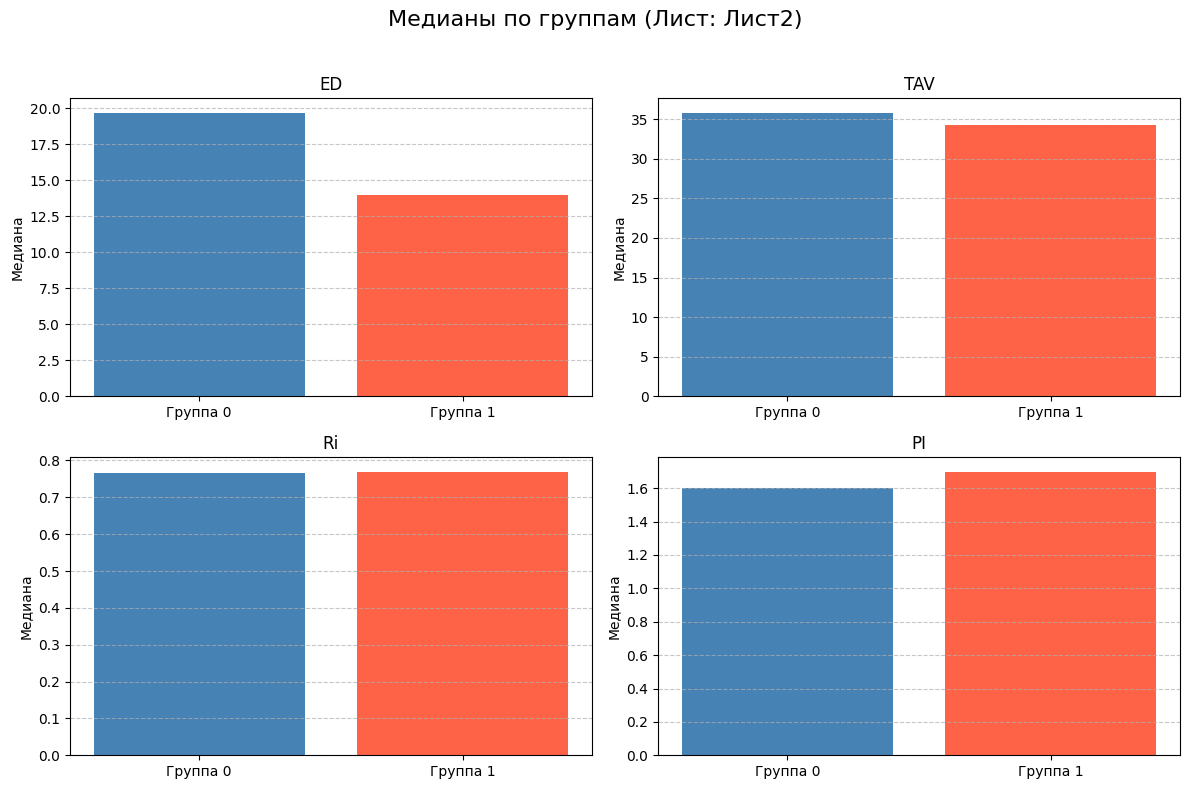

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Загрузка Excel-файла и выбор листа
file_path = input("Введите путь к Excel-файлу (например, 'clinical_data.xlsx'): ").strip()
xls = pd.ExcelFile(file_path)

# Выводим список доступных листов
print("\nДоступные листы в файле:")
for i, sheet in enumerate(xls.sheet_names):
    print(f"{i + 1}. {sheet}")

# Пользователь выбирает лист
choice = int(input("\nВыберите номер листа для анализа: ")) - 1
sheet_name = xls.sheet_names[choice]

# Загружаем выбранный лист в DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Шаг 2: Проверка структуры данных
# Предполагается, что столбец A — это 'группа' (0 или 1)
# Если в Excel столбец A не имеет названия, pandas назовёт его 'Unnamed: 0'
# Поэтому сначала убедимся, что первый столбец — это группа

if df.columns[0] == 'Unnamed: 0':
    # Переименовываем первый столбец в 'group'
    df = df.rename(columns={df.columns[0]: 'group'})
else:
    # Или просто используем первый столбец как 'group'
    df = df.rename(columns={df.columns[0]: 'group'})

# Убедимся, что 'group' содержит только 0 и 1
# print(df)
df['group'] = df['group'].astype(int)
assert set(df['group'].unique()).issubset({0, 1}), "Столбец 'group' должен содержать только 0 и 1"

# Шаг 3: Выделяем только числовые столбцы (исключая 'group')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'group' in numeric_cols:
    numeric_cols.remove('group')

if not numeric_cols:
    raise ValueError("Не найдено числовых столбцов для анализа (кроме 'group')")

print(f"\nНайдены числовые признаки для анализа: {numeric_cols}")

# Шаг 4: Группировка и вычисление медиан
# Создаём словарь: для каждого признака — медианы по группам
medians_by_feature = {}

for col in numeric_cols:
    # Группируем по 'group' и вычисляем медиану в каждой группе
    grouped_medians = df.groupby('group')[col].median()
    # Убедимся, что есть обе группы (0 и 1)
    for group in [0, 1]:
        if group not in grouped_medians:
            grouped_medians[group] = np.nan  # или 0, если предпочтительно
    medians_by_feature[col] = grouped_medians.sort_index()  # [0, 1]

# Шаг 5: Визуализация — по одной диаграмме на признак
n_features = len(numeric_cols)
n_cols_plot = 2  # количество диаграмм в строке
n_rows_plot = (n_features + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(6 * n_cols_plot, 4 * n_rows_plot))
fig.suptitle(f'Медианы по группам (Лист: {sheet_name})', fontsize=16)

# Если только один признак — axes не будет массивом
if n_features == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    medians = medians_by_feature[col]

    # Строим столбчатую диаграмму: два столбца — группа 0 и группа 1
    ax.bar(['Группа 0', 'Группа 1'], [medians[0], medians[1]], color=['steelblue', 'tomato'])
    ax.set_title(f'{col}')
    ax.set_ylabel('Медиана')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Скрываем пустые подграфики (если их больше, чем признаков)
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # оставляем место для общего заголовка
plt.show()

Описание от Qwen

Подробное объяснение ключевых моментов:

* Выбор листа: Скрипт сначала показывает все листы в Excel-файле и позволяет пользователю выбрать нужный по номеру — это делает его гибким для файлов с несколькими исследованиями.
* Обработка столбца группы: Excel часто сохраняет первый столбец без заголовка как 'Unnamed: 0'. Скрипт автоматически переименовывает его в 'group' и проверяет, что значения — только 0 и 1.
*Группировка перед медианой: Используется df.groupby('group')[col].median() — это гарантирует, что медиана считается внутри каждой группы отдельно, как вы и просили.
* Только числовые данные: Скрипт автоматически отбирает только числовые столбцы (исключая 'group'), чтобы избежать ошибок при вычислении медианы.
* Визуализация: Для каждого признака строится отдельная столбчатая диаграмма с двумя столбцами — медиана группы 0 и медиана группы 1. Цвета различаются для наглядности.
* Гибкость: Скрипт работает с любым количеством признаков — автоматически подстраивает сетку графиков (2 в строке), скрывает лишние.

Этот подход соответствует лучшим практикам биостатистики: медиана устойчива к выбросам (важно в клинических данных), группировка корректна, а визуализация позволяет быстро сравнивать центральные тенденции между группами.


# Промпт от преподавателя

Проводим клиническое исследование. Результаты надо визуализировать.
Вот описание задачи в целом.
Проводим наблюдения за пациентами. У каждого пациента измерены определенные показатели (например, липидный спектр: холестерин, ЛПВП, ЛПНП).
Пациенты относятся к одной их возможных групп (например, плацебо и лечение статинами).
Вот описание формата файла
Есть эксель файл. В колонке A, которая называется "Группы", указаны номера групп: 1, 2, 3. Как минимум две группы есть; возможно, групп чуть больше, но точно не больше 4.
В следующих столбцах, названия которых соответствуют изучаемым показателям, указаны значения этих показателей.

Для каждой группы пациентов и для каждого показателя надо найти медианы и 95% доверительные интервалы для медиан.

Построить столбчатую диаграмму, сгруппировав столбцы по показателям:
слева первый показатель и там столбцы:
 -- количество столбцов = количеству групп,
 -- высота столбцов = медиане показателя в этой группе,
 -- усы на столбце соответствуют 95% доверительному интервалу для медианы.

Если ты не знаешь, как вычислять 95% доверительные интервалы для медианы, то вот подсказка.
Пусть n - число пациентов у группе
Определим параметр k = ОКРУГЛВНИЗ(n/2-1.96*КОРЕНЬ(n)/2) для вычисления соответствующих порядковых статистик
нижняя граница = ИНДЕКС(упорядоченный массив; k)
нижняя граница = ИНДЕКС(упорядоченный массив; n - k + 1)